In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import ast

df_metadata=pd.read_csv("archive/movies_metadata.csv")
df_rating=pd.read_csv("archive/ratings.csv")
#Lösche doppelt Wete in 'id' Spalte
df_metadata = df_metadata.drop_duplicates(subset='id', keep='first')
#Konvertiert zu String
df_metadata['id'] = df_metadata['id'].astype(str)
df_rating['movieId'] = df_rating['movieId'].astype(str)
df_metadata=df_metadata[['id','genres']].dropna()
df_rating=df_rating[['movieId','rating']].dropna()
df_metadata.head()


C:\Users\49160\AppData\Local\Temp\ipykernel_17780\3549036447.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_metadata=pd.read_csv("archive/movies_metadata.csv")


,id,genres
0,862,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,8844,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,15602,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,31357,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,11862,"[{'id': 35, 'name': 'Comedy'}]"


In [ ]:
#Konvertieren eine String zu eine Liste,wenn möglich ist
def convert_string_to_list(value):
    if isinstance(value, str):  
        try:
            return ast.literal_eval(value)
        except (ValueError, SyntaxError):
            return []  # Falls Fehler auftreten, gib eine leere Liste zurück
    return value 
# 2 DataFrames zusammenfügen
df_merged=pd.merge(df_metadata,df_rating,left_on='id',right_on='movieId',how='inner')
#df_merged = df_merged.sample(n=1000)  
#Values in 'genre' Spalte in eine String konvertieren
df_merged['genres'] = df_merged['genres'].apply(lambda x:convert_string_to_list(x)) 
#'genre_names' Spalte erstellen
#Namen von Genres von 'genres' in genre_names' übertragen
df_merged['genre_names'] = df_merged['genres'].apply(lambda x: [genre['name'] for genre in x])

df_merged['genre_names'] = df_merged['genre_names'].apply(lambda x:convert_string_to_list(x)) 
#Für jerer element in Liste in  'genre_nammes' Spalte sepatrate Zeile erstellen
df_merged['genre_names']=df_merged['genre_names'].apply(lambda li:[i for i in li])
#Füllen entstehende Zeile in andere Zeilen mit entsprechende Values
exploded_df = df_merged.explode('genre_names')
exploded_df.head()



,id,genres,movieId,rating,genre_names
11035129,4728,"[{'id': 35, 'name': 'Comedy'}]",4728,2.5,Comedy
5982238,470,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",470,1.0,Drama
5982238,470,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",470,1.0,Crime
5982238,470,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",470,1.0,Thriller
10162577,3052,"[{'id': 35, 'name': 'Comedy'}]",3052,3.0,Comedy


In [ ]:
#Finden Mittlewert von Bewertungen pro ein Film
rating_per_movie=exploded_df.groupby('movieId')['rating'].mean()
#Ene Serie und ein DataFrame zusammenfügen
df_rating_per_movie=pd.merge(exploded_df[['movieId','genre_names']],rating_per_movie,on='movieId',how='inner')
#eine Serie mit Mittlewert von Bewertungen pro ein Genre erstellen
rating_per_genre=df_rating_per_movie.groupby('genre_names')['rating'].mean()


#rating_per_genre=
rating_per_genre.head()

genre_names
Action       3.655440
Adventure    3.510791
Animation    3.309524
Comedy       3.542593
Crime        3.508380
Name: rating, dtype: float64

C:\Users\49160\AppData\Local\Temp\ipykernel_17780\3630459596.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Bewertung")


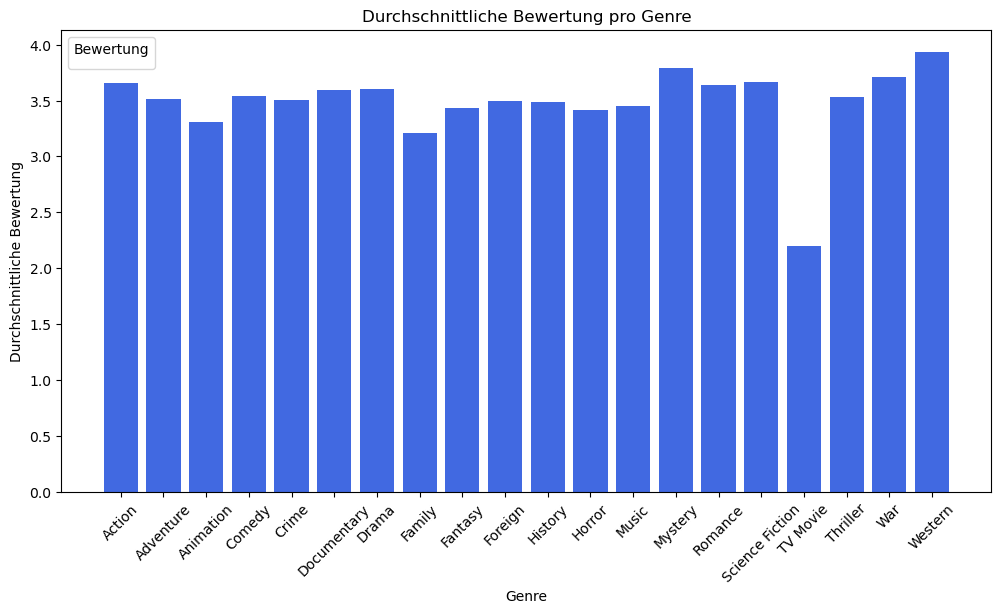

In [ ]:
# Balkendiagramm erstellen
plt.figure(figsize=(12, 6))
plt.bar(rating_per_genre.index, rating_per_genre.values, color="royalblue")

# Achsenbeschriftungen und Titel setzen
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Durchschnittliche Bewertung")
plt.title("Durchschnittliche Bewertung pro Genre")

# Diagramm anzeigen
plt.show()